In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

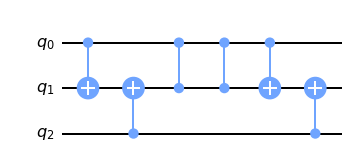

In [78]:
# We will create our search parameter of |010>

oracle = QuantumCircuit(3, name = 'Oracle')

#changing the phase of |010>
#oracle.cx([1,1],[0,2])
oracle.cx(0,1)
oracle.cx(2,1)

oracle.cz(0,1)
oracle.cz(0,1)

oracle.cx(0,1)
oracle.cx(2,1)
#oracle.cx([1,1],[0,2])

oracle.to_gate()

oracle.draw(output = 'mpl')

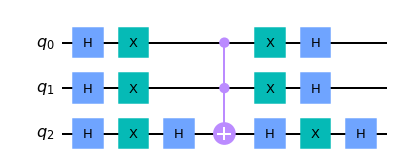

In [79]:
# Now Creating Diffuser
# This will be do the reflection as well as amplitude amplification

diffuser = QuantumCircuit(3,name = 'Diffuser')

#
diffuser.h([0,1,2])
diffuser.x([0,1,2])

# Do multi-controlled-Z gate
diffuser.h(2)
diffuser.mct([0,1],2)
diffuser.h(2)


#
diffuser.x([0,1,2])
diffuser.h([0,1,2])

diffuser.to_gate()
diffuser.draw(output = 'mpl')

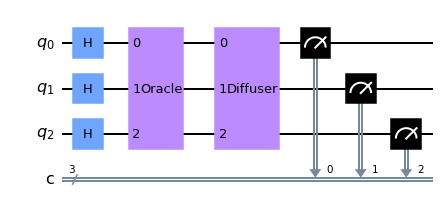

In [80]:
# Creating Qunatum circuit and importing our 3-qubit data, and search our oracle parameter

qc = QuantumCircuit(3,3)

#Creating data set of 3-qubit system
qc.h([0,1,2])

qc.append(oracle,[0,1,2])
qc.append(diffuser,[0,1,2])

qc.measure([0,1,2],[0,1,2])

qc.draw(output = 'mpl')

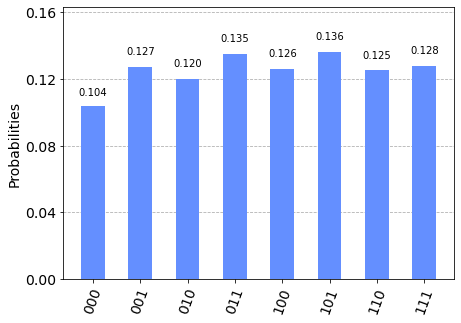

In [81]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)